---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [João Marcelo](https://https://www.linkedin.com/in/jo%C3%A3o-marcelo-fonseca-cunha-097776a2/)*  

---

# **Aplicação de Churn Prediction em Empresa de Telecomunicações com Machine Learning**

# Metodologia CRISP-DM


Antes de iniciarmos o nosso projeto, pontuamos que as etapas da documentação do nosso trabalho serão baseadas nos [*frameworks* CRISP-DM](https://www.knowsolution.com.br/voce-sabe-o-que-e-metodologia-crisp-dm-descubra-aqui/), rotina que se adequa à maior parte dos meu projetos de Data Science. Ao longo deste trabalho, procuramos sempre seguir as etapas do fluxo abaixo.

<p align=center>
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width="40%"></p>

#1 - Entendimento do Problema

A primeira etapa consiste na identificação das necessidades do nosso projeto. De forma resumida, é nessa etapa que fazemos a identificação do tema abordado, entendimento do processo, além de várias outras etapas de análise aprofundada do nosso problema. Ao fim dessa etapa devemos saber qual problema precisamos resolver e quais soluções hipotéticas para temos para que isso aconteça. Em nosso projeto, vamos abordar o Churn Prediction de uma companhia, que representa a taxa de evasão da sua base de clientes.

## Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

Ela é de extrema importância para a administração e gestão, e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

<p align=center>
<img src="https://miro.medium.com/max/1024/1*YRq10sAcj2ScV2TirdSKBg.png" width="60%"></p>

**Como calcular a taxa de churn do seu negócio?**

O cálculo da taxa de churn rate é feito a partir da divisão entre os clientes que interromperam o serviço no fim do período pré-determinado pelo número de clientes no início desse mesmo período, multiplicada por 100, a fim de obtermos a taxa em formato de porcentagem.

De forma prática, seria algo assim: suponhamos que a sua empresa tenha 1000 clientes no início de um mês. Ao fim desse mesmo mês — ou outro período de análise pré-determinado — , o número de clientes cai para 950.

Utilizando esses dados, o cálculo do seu churn rate seria: 

50 (número de clientes que interromperam o serviço) / 1000 (clientes no início do processo) x 100 = 5%

Assim, nesse exemplo, a taxa de churn rate é de 5%.  Ou seja, 5% dos clientes daquele mês deixaram de manter parceria com a sua empresa.

Nosso dataset não apresenta  a taxa em percentual do churn para cada cliente. Ele apenas sinaliza como Yes ou No se o cliente poderá cancelar o serviço.

## Preparando o ambiente

Antes de iniciarmos nosso trabalho, precisamos preparar nosso ambiente. Abaixo apresentamos a importação de alguns pacotes necessários em nossas análises.


In [ ]:
# instalando algumas bibliotecas no Colab
!pip install scikit-plot -q
!pip install imbalanced-learn -q

# desconsiderar os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# importando balanceamento RUS
from imblearn.under_sampling import RandomUnderSampler

# importando balanceamento SMOTE
from imblearn.over_sampling import SMOTE

# importando balanceamento ADASYN
from imblearn.over_sampling import ADASYN

# importando métricas
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc


# importando pacotes de padronização e tratamento de variaveis categóricas
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler

# importando pipeline
from sklearn.pipeline import make_pipeline

# importando model_selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

# importando modelos
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

#2 - Entendimento dos Dados

Esta etapa consiste em coletar, organizar e documentar todos os dados que se encontram disponíveis para realizar a análise exploratória.Precisamos identificar os dados importantes para a resolução do problema, analisar a qualidade dos dados, realizar análise descritiva, identificar padrões, obter insights e formular hipóteses.

## Aquisição dos dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# importando os dados
data_path = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(data_path)

In [ ]:
# verificando os primeiros registros
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# verificando o nome das variáveis do dataset
print(f'Nome das variáveis do dataset:{df.columns.values}')

Nome das variáveis do dataset:['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [ ]:
# verificando os dados por coluna para checar distribuição
for column in df_clean.columns:
  print(f'Coluna {column}: {df_clean[column].unique()}')
  print('------------'*10)

**Dicionário das variáveis**

* `customerID` - Código de identificação do cliente
* `gender` - Identidade de gênero do cliente
* `SeniorCitizen` - Identificação de cliente idoso (0 - No/1 - Yes) 
* `Partner` - O cliente possui parceiro(a)? (Yes/No)
* `Dependents` - O cliente possui dependentes? (Yes/No)
* `tenure` - Número de meses que o cliente permaneceu na empresa
* `PhoneService` - O cliente possui serviço de telefonia contratado?(Yes/No)
* `MultipleLines` - O cliente possui múltiplas linhas telefônicas?(Yes/No/No phone services)
* `InternetService` - Tipo de serviço de internet contratado (DSL, Fiber optic, No)
* `OnlineSecurity` - O cliente possui serviço de segurança online contratado?(Yes, No, No internet service)
* `OnlineBackup` - O cliente possui serviço de backup online contratado?(Yes, No, No internet service)
* `DeviceProtection` - O cliente possui plano de proteção de dispositivo?(Yes, No, No internet service)
* `TechSupport` - O cliente possui serviço de suporte tecnológico contratado?(Yes, No, No internet service)
* `StreamingTV` - O cliente possui serviço de streaming de TV contratado?(Yes, No, No internet service)
* `StreamingMovies` - O cliente possui serviço de streaming de filmes contratado?(Yes, No, No internet service)
* `Contract` - Tipo de contrato do cliente(Month-to-month, One year, Two year)
* `PaperlessBilling` - O cliente recebe suas contas apenas eletronicamente, sem envio de correspondência física?(Yes, No)
* `PaymentMethod` - Forma de pagamento(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* `MonthlyCharges` - Valor cobrado mensalmente do cliente 
* `TotalCharges` - Valor total cobrado do cliente
* `Churn` - Cliente identificado com métrica de Churn? (Yes/No)

Com os dados importados para dentro de uma estrutura Dataframe, e após conhecermos melhor as variáveis do nosso dataset podemos relizar a etapa de análise exploratória a fim de obter algum insight ou informação relevante que possa influenciar em nossos modelos de Machine Learning.

## Análise exploratória

In [ ]:
# verificando as dimensões do dataset
print(f'Total de linhas:\t{df.shape[0]}')
print(f'Total de colunas:\t{df.shape[1]}')

Total de linhas:	7043
Total de colunas:	21


In [ ]:
# verificando quantidade de dados únicos por feature
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
# verificando os tipos de cada variável do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Conforme análises prévias documentadas acima podemos observar que:

* Nosso dataset é composto por um total de 7.043 linhas e 21 colunas(features)

* A maioria dos nossos dados são textuais, do tipo object, possuindo de 2 a 4 dados únicos por feature. Mais adiante vamos detalhar esses dados por feature.

* Observamos que a feature TotalCharges, embora seja relacionada a valores númericos, também está como object, o que nos demandará uma conversão para o tipo númerico adequado.

* A feature customerID se refere ao código de identificação de cada cliente, o que não é uma informação relevante em nossas análises, podendo ser descartada.

Abaixo criamos uma nova cópia do dataframe, onde convertemos a coluna Total Charges para o tipo numérico e removemos a feature relacionada ao código do cliente. Toda essa adequação é feita em uma cópia do datafame, de modo a preservar os dados do dataset original.

In [ ]:
# criando uma cópia do dataframe
df_clean = df.copy()

# drop da coluna customer ID
df_clean.drop('customerID', axis=1, inplace=True)

# convertendo string TotalCharges para float
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

Após realizadas as adequações iniciais identificadas, vamos verificar se existem dados nulos/vazios em alguma dessas features.

In [ ]:
# verificando se o dataset possui dados nulos/vazios
df_clean.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# verificando o percentual dos dados nulos/vazios em relação ao total do dataset
df_clean.isnull().sum() * 100 / len(df_clean)

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Verificamos acima que nosso dataset apresenta dados nulos/vazios apenas na feature TotalCharges. São 11 linhas, o que representa um percentual de apenas 0,15% do total do dataset. Abaixo exibimos esses dados.

In [ ]:
df_clean.loc[df.TotalCharges == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Analisando os dados acima verificamos que nenhum deles são de clientes identificados com potenciais cancelamentos. Considerando isso, e levando em conta a baixa representatividade desses dados em nosso dataset, optamos por excluí-los de nossa base de dados.

In [ ]:
# eliminando as linhas com dados ausentes
df_clean.drop(index=df.query('TotalCharges == " "').index, axis=0, inplace=True)

# checando novamente os dados
df_clean.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Após excluirmos os dados ausentes de nossa base de dados, vamos passar para uma etapa de análise um pouco mais detalhada das features, e a relação dessas informações com o nosso *target*, que é a classificação do cliente com Churn prediction. 

Para facilitar nossa análise, vamos novamente verificar os dados únicos por cada coluna, para checarmos a distribuição, e o que cada feature apresenta de informação relevante.

In [ ]:
# verificando os dados por coluna para checar distribuição
for column in df_clean.columns:
  print(f'Coluna {column}: {df_clean[column].unique()}')
  print('------------'*10)

Coluna gender: ['Female' 'Male']
------------------------------------------------------------------------------------------------------------------------
Coluna SeniorCitizen: [0 1]
------------------------------------------------------------------------------------------------------------------------
Coluna Partner: ['Yes' 'No']
------------------------------------------------------------------------------------------------------------------------
Coluna Dependents: ['No' 'Yes']
------------------------------------------------------------------------------------------------------------------------
Coluna tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
------------------------------------------------------------------------------------------------------------------------
Coluna PhoneService: ['No' 'Yes']
----

Ao verificarmos as distribuições de dados por cada coluna, juntamente com as análises de tipos de cada um desses dados, é possível estruturarmos uma melhor forma de analisar cada uma das features e sua relação na identificação de  potenciais cancelamentos dos serviços por parte dos clientes.

Identificamos que nosso dataset apresenta informações que podem ser separadas em 'categorias', para nortear um poucos nossas análises. São elas:

* **Vetor alvo** - É a própria coluna de `Churn`, que identifica potencial cancelamento.

* **Informações de valores** - No dataset são representadas pelas colunas de `MonhtlyCharges`, `TotalCharges` e `tenure`. Representam os valores mensais pagos pelo cliente, valores totais já pagos e número de meses que o cliente está na empresa.

* **Informações dos clientes** - São informações dos clientes contidas nas features `gender`, `SeniorCitizen`, `Partner` e `Dependents`.

* **Informações dos serviços contratados** - São informações dos serviços contratados por cada cliente contidas nas features `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` e `StreamingMovies`. 

* **Informações dos pagamentos** - São informações relacionadas ao tipo de contrato e formas de pagamento de cada cliente, contidas nas features `Contract`, `PaperlessBilling` e `PaymentMethod`.

Uma vez que categorizamos nossas features, fica mais fácil analisar cada uma delas. Essa separação possibilita uma análise exploratória com maior consciência situacional permitindo um entendimento mais claro do nosso problema.

Agora vamos analisar cada uma das features, verificando a relação com nosso target vector, que é a identificação de churn prediction.

**Vetor alvo - Churn prediction**

Primeiramente, vamos verificar a divisão de nosso dataset e balanceamento considerando a coluna Churn.

In [ ]:
df_clean.Churn.value_counts() * 100 / len(df_clean)

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [ ]:
# Função auxiliar para marcar porcentagem nos plots
def porcentagem(ax, dados):
  total = float(len(dados))
  for p in ax.patches:
      percentage = f'{(p.get_height()/total)*100:.1f}%'
      x = p.get_x() + p.get_width()/2
      y = p.get_height()
      ax.annotate(percentage, (x, y), fontsize=12, horizontalalignment='center')

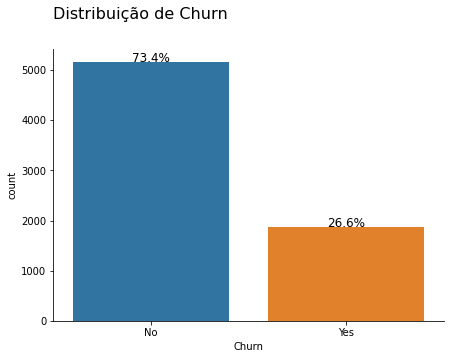

In [ ]:
# gráfico de distribuição de churn
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x='Churn', data=df_clean, ax=ax)
ax.set_title('Distribuição de Churn', loc='left', fontsize=16, pad=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

porcentagem(ax, df_clean)
plt.show();

É possível identificar na feature de Churn que a classe `No` ocorre com frequência muito superior à classe `Yes`, evidenciando que nosso dataset está desbalanceado. Isso será corrigido na etapa de construção do modelo de machine learning

**Features de informações de valores**

A primeira análise interessante a ser feita para as features que contém dados numéricos é a aplicação do método describe, para obtermos as principais informações estatísticas desses números.

In [ ]:
df_clean[['MonthlyCharges', 'TotalCharges', 'tenure']].describe()

,MonthlyCharges,TotalCharges,tenure
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,32.421786
std,30.085974,2266.771362,24.545260
min,18.250000,18.800000,1.000000
25%,35.587500,401.450000,9.000000
50%,70.350000,1397.475000,29.000000
75%,89.862500,3794.737500,55.000000
max,118.750000,8684.800000,72.000000


Verificando o quadro acima, podemos perceber que não existem indícios de outliers nessas features. O desvio padrão de cada uma delas não é um valor alto, sendo até coerente com a própria média, e o valor máximo não se distancia muito do terceiro quartil.

Isso pode ser corroborado pelo boxplot abaixo das features MonthlyCharges e TotalCharges, que nos mostra a distribuição desses valores sem nenhum plot fora dos limites superior e inferior.

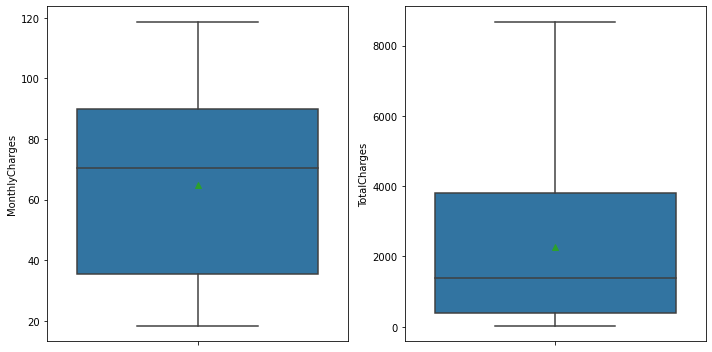

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(y=df_clean['MonthlyCharges'], ax=ax[0], showmeans=True)
sns.boxplot(y=df_clean['TotalCharges'], ax=ax[1], showmeans=True)

plt.tight_layout();

Abaixo fazemos a análises desses valores com a coluna de Churn, para verificar relação entre elas.

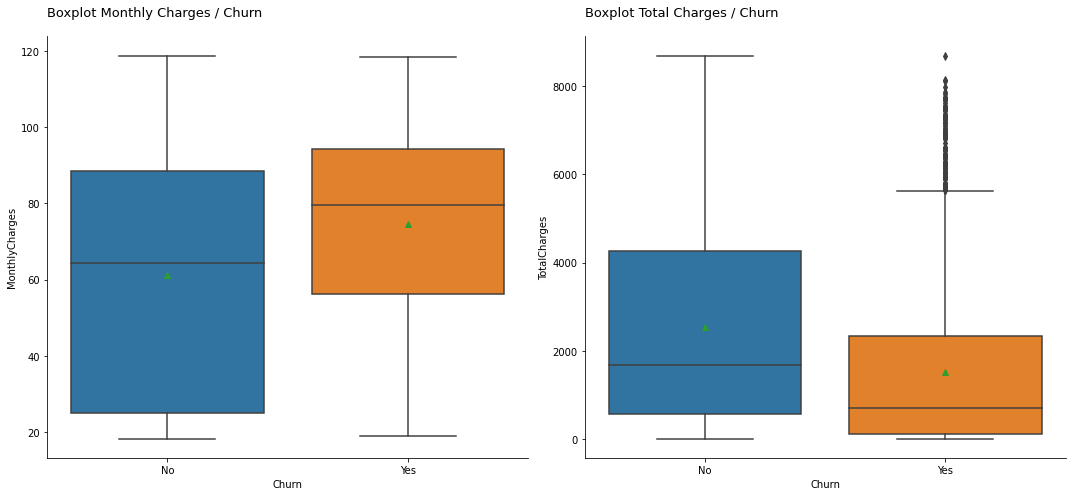

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,7))

sns.boxplot(x='Churn', y='MonthlyCharges', data=df_clean, ax=ax[0], showmeans=True)
ax[0].set_title('Boxplot Monthly Charges / Churn', loc='left', fontsize=13, pad=20)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].grid(False)

sns.boxplot(x='Churn', y='TotalCharges', data=df_clean, ax=ax[1], showmeans=True)
ax[1].set_title('Boxplot Total Charges / Churn', loc='left', fontsize=13, pad=20)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].grid(False)

plt.tight_layout();

Conforme plot acima podemos perceber, primeiramente, que a distribuição é maior para os dados não identificados como Churn. Evidentemente isso ocorre  porque os clientes com churn positive representam apenas 26,5% do dataset. Outro ponto interessante é que a média dos valores mensais cobrados é mais elevada para os casos identificados como churn prediction. Possivelmente esse preço elevado da cobrança pode ser um dos fatores principais para este churn.

Abaixo fizemos uma análise de densidade das variáveis de TotalCharges, MonthlyCharges e tenure, para verificar a distribuição de cada uma delas relacionada ao churn prediction.

In [ ]:
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Gráfico de densidade - {}".format(feature), loc='left', fontsize=16, pad=30)
    ax0 = sns.distplot(df_clean[df_clean['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             label= 'Churn: No')
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    
    ax1 = sns.distplot(df_clean[df_clean['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             label= 'Churn: Yes')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    plt.legend()

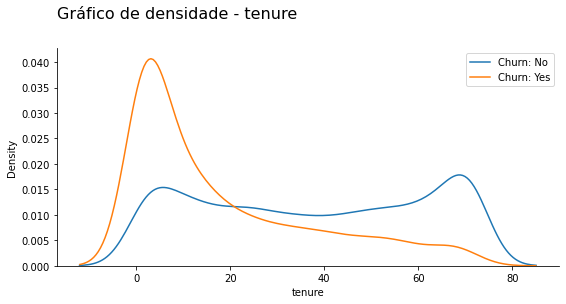

In [ ]:
kdeplot('tenure', hist=False, kde=True)
plt.show()

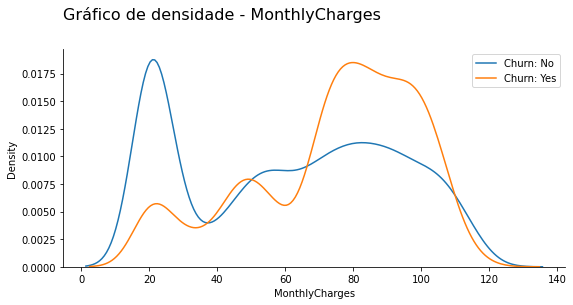

In [ ]:
kdeplot('MonthlyCharges', hist=False, kde=True)

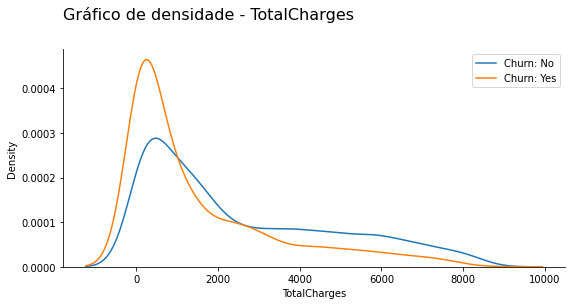

In [ ]:
kdeplot('TotalCharges', hist=False, kde=True)

Dos plots acima é possível perceber que:

* O churn ocorre com mais frequência em clientes com pouco tempo de plano, em torno de 10 a 20 meses de contrato, sendo menos frequente ao longo do contrato.

* Clientes com cobranças mensais mais altas também têm maior probabilidade de churn.

* O valor de cobrança total tem comportamentos semelhantes em ambos os casos.

**Features de informações dos clientes**

Abaixo fazemos as análises das features relacionadas a informações do cliente, verificando a distribuição de cada uma delas e como elas se relacionam com o churn prediction.

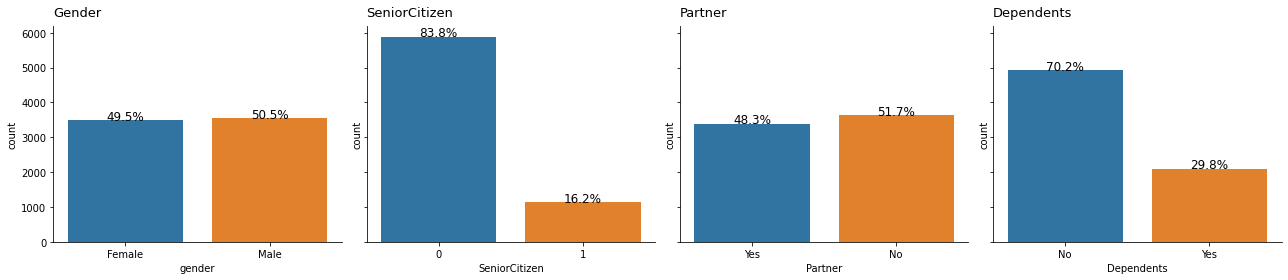

In [ ]:
# plot de informações dos clientes
fig, ax = plt.subplots(1,4, figsize=(18,4), sharey=True)

sns.countplot(x='gender', data=df_clean, ax=ax[0])
ax[0].set_title('Gender', loc='left', fontsize=13, pad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(False)
porcentagem(ax[0], df_clean)

sns.countplot(x='SeniorCitizen', data=df_clean, ax=ax[1])
ax[1].set_title('SeniorCitizen', loc='left', fontsize=13, pad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(False)
porcentagem(ax[1], df_clean)

sns.countplot(x='Partner', data=df_clean, ax=ax[2])
ax[2].set_title('Partner', loc='left', fontsize=13, pad=10)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].grid(False)
porcentagem(ax[2], df_clean)

sns.countplot(x='Dependents', data=df_clean, ax=ax[3])
ax[3].set_title('Dependents', loc='left', fontsize=13, pad=10)
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].grid(False)
porcentagem(ax[3], df_clean)

plt.tight_layout();

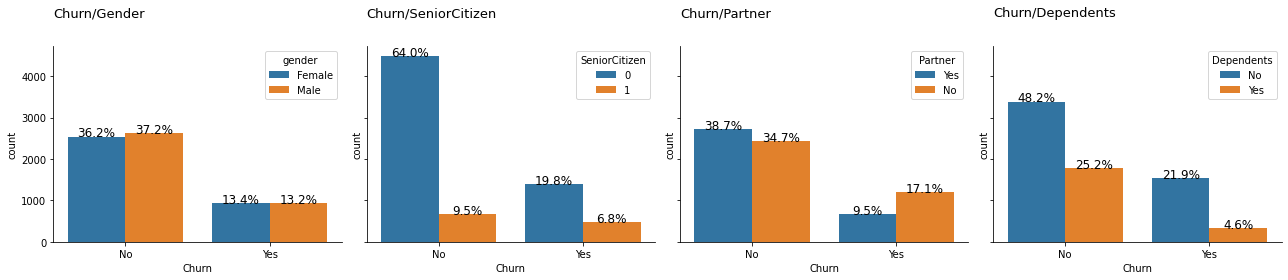

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(18,4), sharey=True)
sns.countplot(x='Churn', data=df_clean, ax=ax[0], hue='gender')
ax[0].set_title('Churn/Gender', loc='left', fontsize=13, pad=30)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(False)
porcentagem(ax[0], df_clean)

sns.countplot(x='Churn', data=df_clean, ax=ax[1], hue='SeniorCitizen')
ax[1].set_title('Churn/SeniorCitizen', loc='left', fontsize=13, pad=30)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(False)
porcentagem(ax[1], df_clean)

sns.countplot(x='Churn', data=df_clean, ax=ax[2], hue='Partner')
ax[2].set_title('Churn/Partner', loc='left', fontsize=13, pad=30)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].grid(False)
porcentagem(ax[2], df_clean)

sns.countplot(x='Churn', data=df_clean, ax=ax[3], hue='Dependents')
ax[3].set_title('Churn/Dependents', loc='left', fontsize=13, pad=30)
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].grid(False)
porcentagem(ax[3], df_clean)


plt.tight_layout();

Conforme plots acima podemos verificar que praticamente não existem diferenças em relação ao sexo para definir se o cliente irá cancelar ou não o seu serviço. Verificamos também que clientes sem parceiros e sem dependentes possuem uma taxa maior de churn.

**Features de informações dos serviços contratados**

Abaixo fazemos as análises das features relacionadas a informações dos serviços contratados pelo cliente, verificando a distribuição de cada uma delas e como elas se relacionam com nosso churn prediction.

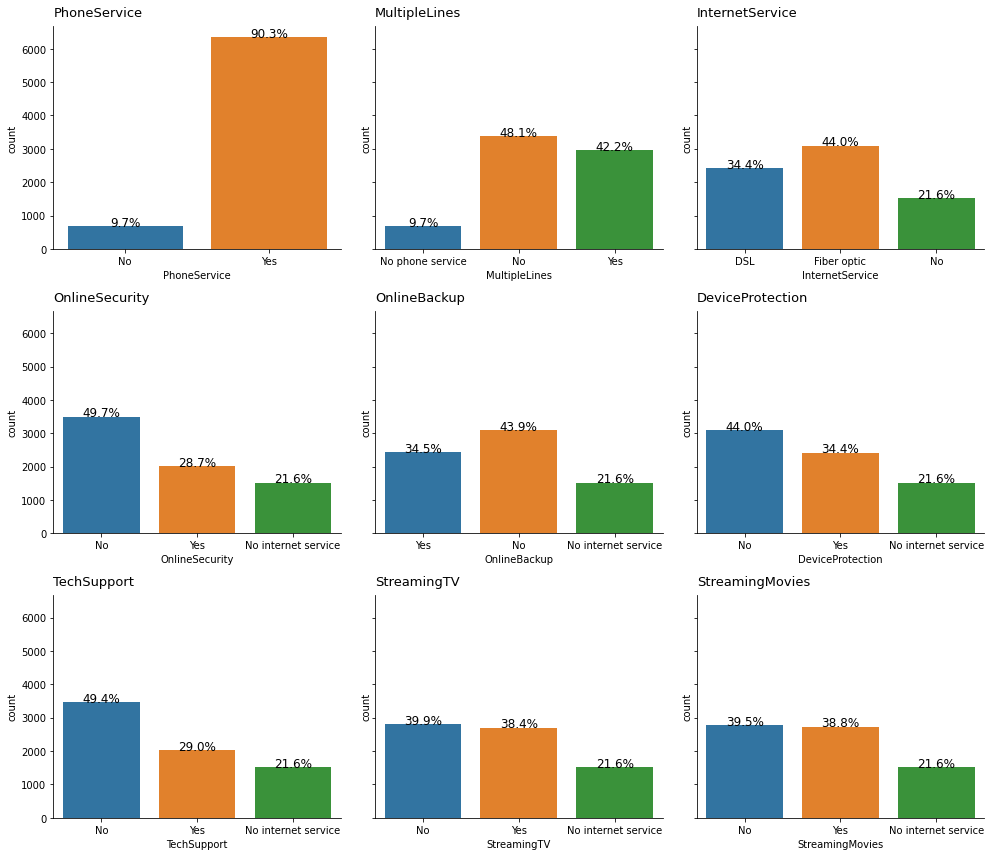

In [ ]:
# informações dos serviços contratados
fig, ax = plt.subplots(3,3, figsize=(14,12), sharey=True)

sns.countplot(x='PhoneService', data=df_clean, ax=ax[0,0])
ax[0,0].set_title('PhoneService', loc='left', fontsize=13, pad=10)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].grid(False)
porcentagem(ax[0,0], df_clean)

sns.countplot(x='MultipleLines', data=df_clean, ax=ax[0,1])
ax[0,1].set_title('MultipleLines', loc='left', fontsize=13, pad=10)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].grid(False)
porcentagem(ax[0,1], df_clean)

sns.countplot(x='InternetService', data=df_clean, ax=ax[0,2])
ax[0,2].set_title('InternetService', loc='left', fontsize=13, pad=10)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].grid(False)
porcentagem(ax[0,2], df_clean)

sns.countplot(x='OnlineSecurity', data=df_clean, ax=ax[1,0])
ax[1,0].set_title('OnlineSecurity', loc='left', fontsize=13, pad=10)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].grid(False)
porcentagem(ax[1,0], df_clean)

sns.countplot(x='OnlineBackup', data=df_clean, ax=ax[1,1])
ax[1,1].set_title('OnlineBackup', loc='left', fontsize=13, pad=10)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].grid(False)
porcentagem(ax[1,1], df_clean)

sns.countplot(x='DeviceProtection', data=df_clean, ax=ax[1,2])
ax[1,2].set_title('DeviceProtection', loc='left', fontsize=13, pad=10)
ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].grid(False)
porcentagem(ax[1,2], df_clean)

sns.countplot(x='TechSupport', data=df_clean, ax=ax[2,0])
ax[2,0].set_title('TechSupport', loc='left', fontsize=13, pad=10)
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)
ax[2,0].grid(False)
porcentagem(ax[2,0], df_clean)

sns.countplot(x='StreamingTV', data=df_clean, ax=ax[2,1])
ax[2,1].set_title('StreamingTV', loc='left', fontsize=13, pad=10)
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)
ax[2,1].grid(False)
porcentagem(ax[2,1], df_clean)

sns.countplot(x='StreamingMovies', data=df_clean, ax=ax[2,2])
ax[2,2].set_title('StreamingMovies', loc='left', fontsize=13, pad=10)
ax[2,2].spines['top'].set_visible(False)
ax[2,2].spines['right'].set_visible(False)
ax[2,2].grid(False)
porcentagem(ax[2,2], df_clean)

plt.tight_layout();

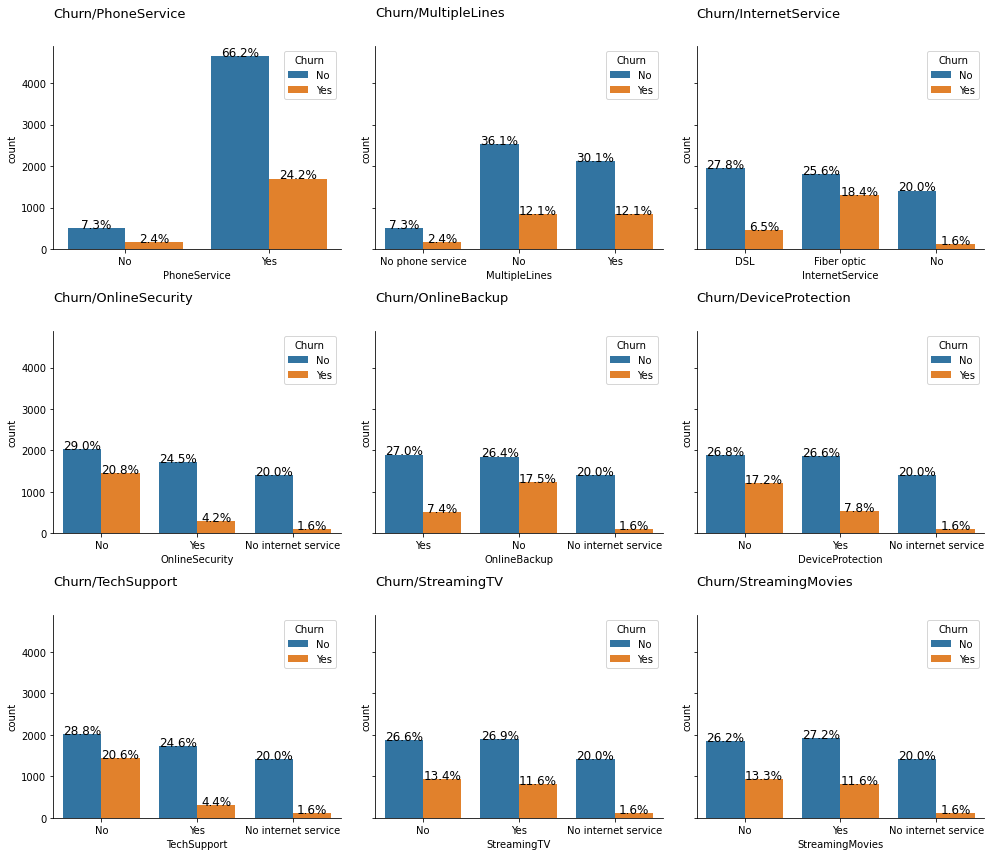

In [ ]:
# informações do cliente
fig, ax = plt.subplots(3,3, figsize=(14,12), sharey=True)
sns.countplot(x='PhoneService', data=df_clean, ax=ax[0,0], hue='Churn')
ax[0,0].set_title('Churn/PhoneService', loc='left', fontsize=13, pad=30)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].grid(False)
porcentagem(ax[0,0], df_clean)

sns.countplot( x='MultipleLines', data=df_clean,ax=ax[0,1], hue='Churn')
ax[0,1].set_title('Churn/MultipleLines', loc='left', fontsize=13, pad=30)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].grid(False)
porcentagem(ax[0,1], df_clean)

sns.countplot( x='InternetService', data=df_clean,ax=ax[0,2], hue='Churn')
ax[0,2].set_title('Churn/InternetService', loc='left', fontsize=13, pad=30)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].grid(False)
porcentagem(ax[0,2], df_clean)

sns.countplot( x='OnlineSecurity', data=df_clean,ax=ax[1,0], hue='Churn')
ax[1,0].set_title('Churn/OnlineSecurity', loc='left', fontsize=13, pad=30)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].grid(False)
porcentagem(ax[1,0], df_clean)

sns.countplot( x='OnlineBackup', data=df_clean,ax=ax[1,1], hue='Churn')
ax[1,1].set_title('Churn/OnlineBackup', loc='left', fontsize=13, pad=30)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].grid(False)
porcentagem(ax[1,1], df_clean)

sns.countplot( x='DeviceProtection', data=df_clean,ax=ax[1,2], hue='Churn')
ax[1,2].set_title('Churn/DeviceProtection', loc='left', fontsize=13, pad=30)
ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].grid(False)
porcentagem(ax[1,2], df_clean)

sns.countplot( x='TechSupport', data=df_clean,ax=ax[2,0], hue='Churn')
ax[2,0].set_title('Churn/TechSupport', loc='left', fontsize=13, pad=30)
ax[2,0].spines['top'].set_visible(False)
ax[2,0].spines['right'].set_visible(False)
ax[2,0].grid(False)
porcentagem(ax[2,0], df_clean)

sns.countplot( x='StreamingTV', data=df_clean,ax=ax[2,1], hue='Churn')
ax[2,1].set_title('Churn/StreamingTV', loc='left', fontsize=13, pad=30)
ax[2,1].spines['top'].set_visible(False)
ax[2,1].spines['right'].set_visible(False)
ax[2,1].grid(False)
porcentagem(ax[2,1], df_clean)

sns.countplot( x='StreamingMovies', data=df_clean,ax=ax[2,2], hue='Churn')
ax[2,2].set_title('Churn/StreamingMovies', loc='left', fontsize=13, pad=30)
ax[2,2].spines['top'].set_visible(False)
ax[2,2].spines['right'].set_visible(False)
ax[2,2].grid(False)
porcentagem(ax[2,2], df_clean)
plt.tight_layout();

Com as análises acima, podemos perceber que:

* O churn é menor para os clientes que não possuem serviço telefônico, multíplas linhas ou serviço de internet.

* Os clientes com serviço de fibra óptica tendem a cancelar mais o plano com a operadora.

* A maioria dos clientes não possuem serviços adicionais de segurança e suporte, sendo que a taxa de Churn é menor para os clientes que possuem esses serviços.

* O churn é maior para os clientes que não possuem streaming de Tv e filmes

**Features de informações dos pagamentos**

Abaixo fazemos as análises das features relacionadas ao tipo de contrato e formas de pagamento de cada cliente, verificando a distribuição de cada uma delas e como elas se relacionam com o churn prediction.

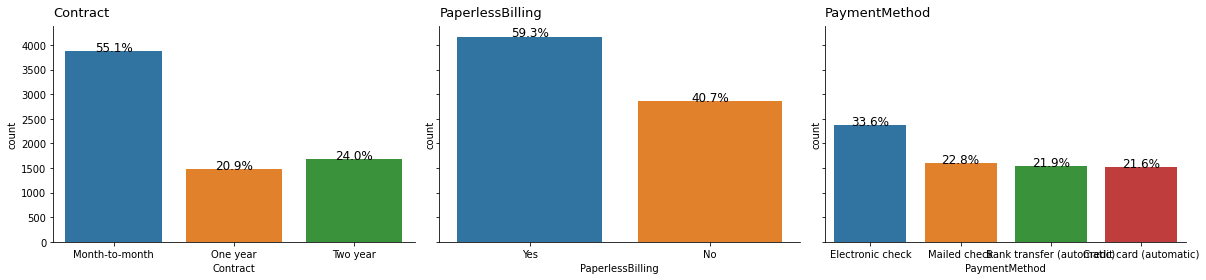

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(17,4), sharey=True)

sns.countplot(x='Contract', data=df_clean, ax=ax[0])
ax[0].set_title('Contract', loc='left', fontsize=13, pad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(False)
porcentagem(ax[0], df_clean)

sns.countplot(x='PaperlessBilling', data=df_clean, ax=ax[1])
ax[1].set_title('PaperlessBilling', loc='left', fontsize=13, pad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(False)
porcentagem(ax[1], df_clean)

sns.countplot(x='PaymentMethod', data=df_clean, ax=ax[2])
ax[2].set_title('PaymentMethod', loc='left', fontsize=13, pad=10)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].grid(False)
porcentagem(ax[2], df_clean)

plt.tight_layout();


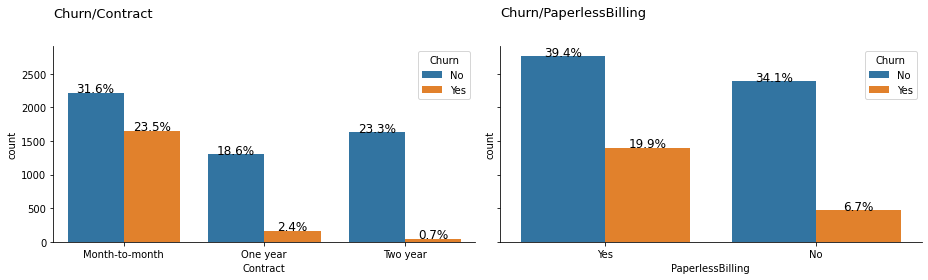

In [ ]:
# plot churn por contrato e tipo de conta
fig, ax = plt.subplots(1,2, figsize=(13,4), sharey=True)

sns.countplot(x='Contract', data=df_clean, ax=ax[0], hue='Churn')
ax[0].set_title('Churn/Contract', loc='left', fontsize=13, pad=30)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(False)
porcentagem(ax[0], df_clean)

sns.countplot(x='PaperlessBilling', data=df_clean, ax=ax[1], hue='Churn')
ax[1].set_title('Churn/PaperlessBilling', loc='left', fontsize=13, pad=30)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(False)
porcentagem(ax[1], df_clean)

plt.tight_layout();


Com relação aos tipos de contrato podemos observar que:

* A maioria dos clientes possuem contrato mensal,  sendo eles os que possuem a maior taxa de churn.

* A menor taxa de churn é para contratos com vigência de dois anos.

* A maioria dos clientes opta  por receber a conta de forma eletrônica, sendo assim a categoria com maior probabilidade de churn.

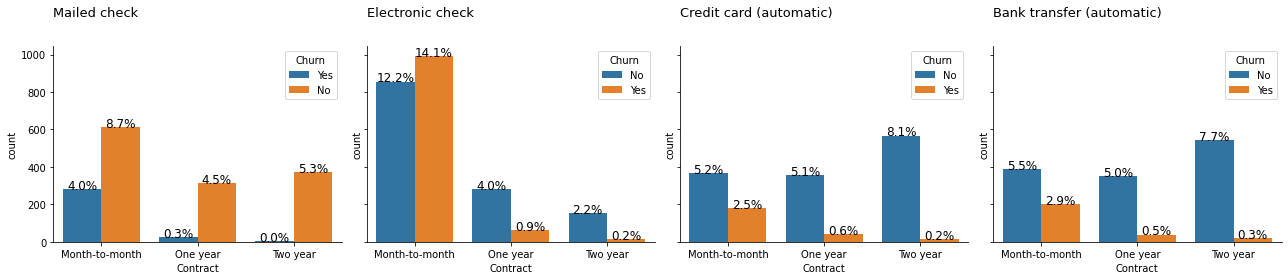

In [ ]:
# plots por tipo de pagamento
fig, ax = plt.subplots(1,4, figsize=(18,4), sharey=True)

sns.countplot(data=df_clean[df_clean.PaymentMethod == 'Mailed check'].sort_values(by='Contract'), x='Contract', hue='Churn', ax=ax[0])
ax[0].set_title('Mailed check', loc='left', fontsize=13, pad=30)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(False)
porcentagem(ax[0], df_clean)

sns.countplot(data=df_clean[df_clean.PaymentMethod == 'Electronic check'].sort_values(by='Contract'), x='Contract', hue='Churn', ax=ax[1])
ax[1].set_title('Electronic check', loc='left', fontsize=13, pad=30)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(False)
porcentagem(ax[1], df_clean)

sns.countplot(data=df_clean[df_clean.PaymentMethod == 'Credit card (automatic)'].sort_values(by='Contract'), x='Contract', hue='Churn', ax=ax[2])
ax[2].set_title('Credit card (automatic)', loc='left', fontsize=13, pad=30)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].grid(False)
porcentagem(ax[2], df_clean)

sns.countplot(data=df_clean[df_clean.PaymentMethod == 'Bank transfer (automatic)'].sort_values(by='Contract'), x='Contract', hue='Churn', ax=ax[3])
ax[3].set_title('Bank transfer (automatic)', loc='left', fontsize=13, pad=30)
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].grid(False)
porcentagem(ax[3], df_clean)

plt.tight_layout();

Acima podemos verificar que o tipo de pagamento com maior taxa de churn é dos clientes que pagam por meio de cheque eletrônico. Observamos também que, dos tipos de contrato de modalidade mensal, o menor churn é para os clientes que realizam pagamento através de cartão de crédito.

#3 - Preparação dos Dados

Nesta etapa precisamos tratar os dados para certificarmos que as informações estão de acordo com o que se espera. Iremos separar as features por tipo de variável e pré-processar as features categóricas.

## Pré-processamento de features categóricas


Nesta etapa de preparação dos dados, será realizado um pré-processamento básico, apenas com a finalidade de construir um modelo base. 

As features binárias (que possuem apenas dois valores únicos) serão processadas utilizando o `LabelEncoder`, incluindo a variável alvo `Churn`.

Em seguida as variáveis serão separadas em categóricas e numéricas, onde as variáveis categóricas serão tratadas com o `getDummies`, assim poderão ser utilizadas em todos os modelos.

In [ ]:
# separando as colunas por tipo de variável
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# criando uma copia do dataframe
df_proc = df_clean.copy()


# Label Encoding para as variáveis binárias
le = LabelEncoder()
for coluna in binary_var:
  df_proc[coluna] = le.fit_transform(df_proc[coluna])

# Encoding com get_dummies para as colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# verificando as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Abaixo plotamos uma matriz de correlação das variáveis após essas primeiras adequações.

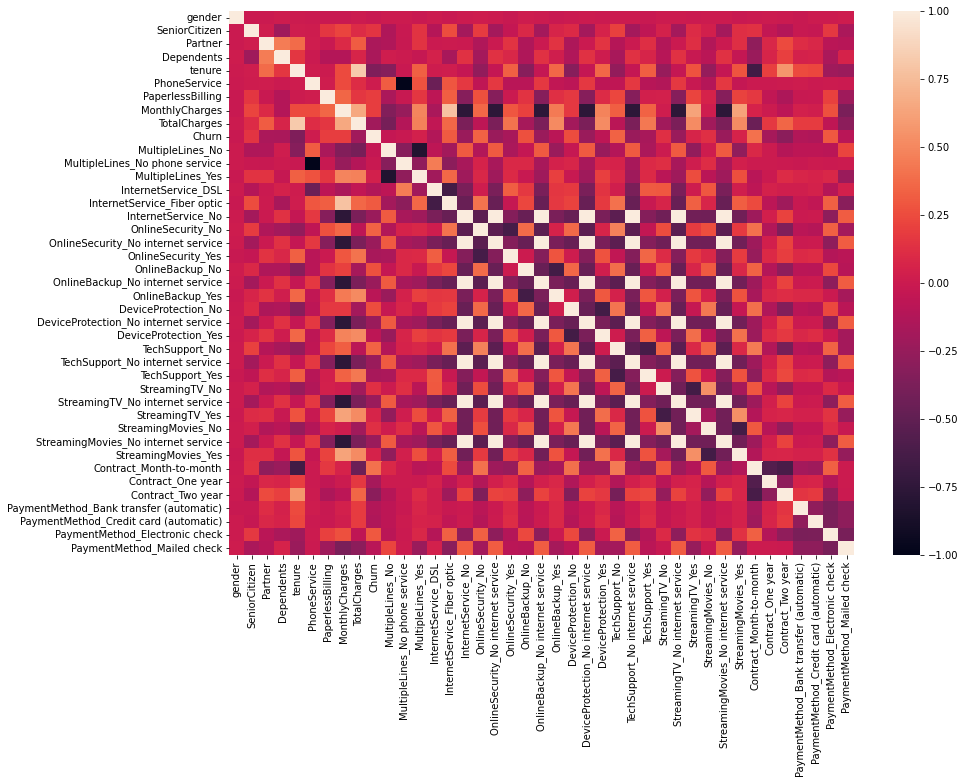

In [ ]:
# plotando a matriz de correlação
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_proc.corr())

plt.show();

#4 - Modelos de Machine Learning

Nesta etapa definimos e avaliamos os modelos de Machine Learning que vamos testar. Documentamos as técnicas selecionadas, motivo da escolha, avaliação e análise do comportamento das métricas para cada modelo de machine learning escolhido. 

## Modelos escolhidos e métricas avaliadas

Com o processamento realizado na etapa anterior, a maioria de nossas features já foram adequadas aos nossos modelos. Precisamos agora padronizar nossas features numéricas e definir os modelos que serão utilizados.

Para podermos comparar o desempenho e melhora do modelo, criaremos baselines para cada um dos modelos a serem avaliados. Não será feito nenhum ajuste nos hiperparâmetros e nem será pensado ainda em balanceamento de dados, feature engineering ou feature selection (entre outros).

Também iremos separar os dados que serão utilizados como treino e como teste. Os dados de teste só irão ser usados na última etapa do projeto, para termos uma avaliação mais real.

Para nosso projeto iremos utilizar os seguintes modelos:

* **Random Forest**

* **Decision Tree**

* **SGD Classifier**

* **Logistic Regression**

* **XGB Classifier**

A ideia é comparar as métrica de cada um dos modelos afim de verificamos o que apresenta os melhores resultados aplicáveis ao nosso problema.

Com relação as métricas que buscamos avaliar é necessário entender o objetivo do nosso modelo e riscos envolvidos. Em uma projeto de análise de Churn Prediction, caso um cliente seja identificado como possível cancelador do serviço e, na realidade, não pretender realizar nenhum cancelamento, o que pode ocorrer é o recebimento por parte do cliente de e-mails, pesquisas de satisfação, medidas que tentariam mitigar o risco de uma evasão de clientes. No entanto, se um cliente realmente desejar desistir do seu plano de assinatura, e a empresa não detectar isso, deixando de adotar estratégias para reter esse cliente, ela poderá perdê-lo. E não se discute que **a rotatividade de clientes afeta diretamente a receita de uma empresa, e também aumenta os seus custos, porque é mais caro adquirir novos clientes do que manter os existentes.**

Portanto, para para o nosso problema considerando o prejuízo financeiro que um churn não sinalizado e monitorado pode gerar para a empresa, iremos priorizar as métricas de **Recall** em nossas análises.

## Split dos dados, padronização e avaliação de modelos com Cross-Validation

Agora iremos dividir o conjunto de dados entre treino, teste. Assim poderemos testar o modelo com uma base de dados que ele não teve contato.Vamos dividir os dados, de forma estratificada pela classe, da seguinte forma:

70% treino
30% teste

Também iremos padronizar nossos dados, isto é, colocar os dados em uma mesma escala e avaliar alguns modelos por meio do Cross Validation,  sendo que essa validação será realizada ainda sem otimização de hiperparâmetros. Para a padronização, serão usados 2 métodos, sendo assim poderemos ter uma melhor comparação de como os modelos se saem com esses dados em cada tipo de padronização. Outro detalhe  é que iremos avaliar primeiramente os modelos com os dados desbalanceados e posteriormente avaliar com os dados balanceados.


**Split dos dados entre feature matrix e target vector**

In [ ]:
# serparar os dados entre feature matrix e target vector
X = df_proc.drop('Churn', axis=1)
y = df_proc.Churn

# dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Verificando necessidade de padronização de variáveis numéricas**

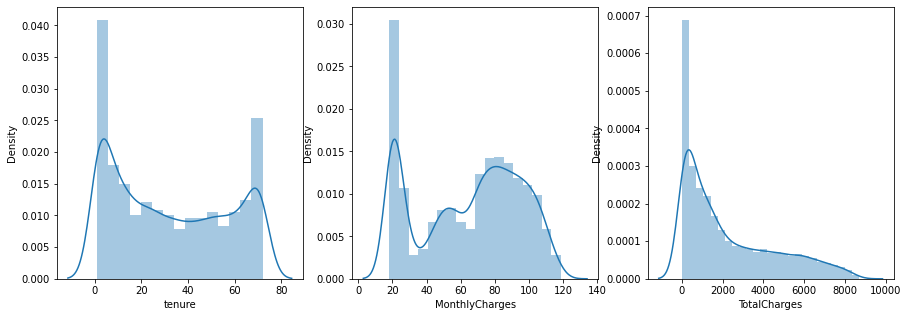

In [ ]:
# plot variáveis numéricas antes da padronização
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df_proc['tenure'], ax=ax[0])
sns.distplot(df_proc['MonthlyCharges'], ax=ax[1])
sns.distplot(df_proc['TotalCharges'], ax=ax[2])

plt.show();

Conforme verificamos acima, nossas variáveis numéricas estão com escalas de valores diferentes. Observando os valores de TotalCharges com MonthlyCharges fica  evidente essa discrepância. Portanto precisamos padronizar nossos dados. Abaixo realizamos um processo de padronização através do StandardScaler.

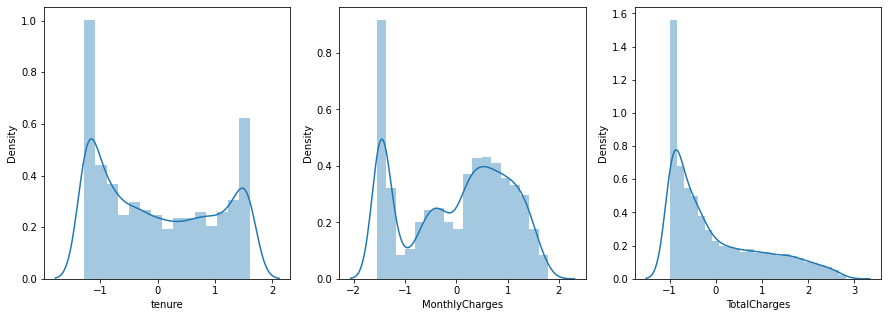

In [ ]:
# plot variáveis numéricas depois da padronização
# padronizando
df_scaler = df_proc.copy()
scaler = StandardScaler()

# fit transform
df_scaler['tenure'] = scaler.fit_transform(df_proc['tenure'].values.reshape(-1,1))
df_scaler['MonthlyCharges'] = scaler.fit_transform(df_proc['MonthlyCharges'].values.reshape(-1,1))
df_scaler['TotalCharges'] = scaler.fit_transform(df_proc['TotalCharges'].values.reshape(-1,1))

#plot
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df_scaler['tenure'], ax=ax[0])
sns.distplot(df_scaler['MonthlyCharges'], ax=ax[1])
sns.distplot(df_scaler['TotalCharges'], ax=ax[2])

plt.show();

Conforme verificamos acima, após o processo de padronização as variáveis passam a ter o mesmo padrão de escala. O plot foi para ilustrar o efeito dessa tratativa nos dados.

## Avaliando modelos com Cross Validation (Dados Desbalanceados)

**Avaliando modelos com Cross Validation**

Iremos a cross-validation para estimar o erro da baseline e dos modelos iniciais. Para facilitar e melhorar o código, foi criada uma função `val_model`. A métrica utilizada para avaliação será `recall`.

In [ ]:
# função de validação de modelo
def val_model(X, y,clf, quite=False):
  """
    Realiza cross-validation com os dados de treino para determinado modelo.

  # Arguments
      X: DataFrame, contém as variáveis independetes.
      y: Series, vetor contendo a variável alvo.
      clf: modelo classificador do Scikit-learn.
      quite: bool, indicando se a função deve imprimir os resultados ou não.

  # Returns
        float, média dos scores da cross-validation.
  """

  X = np.array(X)
  y = np.array(y)

  pipeline1 = make_pipeline(StandardScaler(), clf) 
  pipeline2 = make_pipeline(RobustScaler(), clf)
  scores1 = cross_val_score(pipeline1, X, y, scoring='recall')
  scores2 = cross_val_score(pipeline2, X, y, scoring='recall')

  if quite == False:
    print('Recall StandardScaler: {:.4f} (+/- {:.4f})'.format(scores1.mean(), scores1.std() * 2))
    print('Recall RobustScaler: {:.4f} (+/- {:.4f})'.format(scores2.mean(), scores2.std() * 2))
  
  return scores1.mean()

Aplicaremos a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino para os modelos escolhidos.


In [ ]:
# Instanciando modelos a serem avaliados
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

In [ ]:
# printar o desempenho dos modelos com os dados padronizados
print('Cross-validation RF:')
score_teste1 = val_model(X_train, y_train, rf) 
print('\nCross-validation DT:')
score_teste2 = val_model(X_train, y_train, dt)
print('\nCross-validation SGD:')
score_teste3 = val_model(X_train, y_train, sgd)
print('\nCross-validation LR:')
score_teste4 = val_model(X_train, y_train, lr)
print('\nCross-validation XGB:')
score_teste5 = val_model(X_train, y_train, xgb)

Cross-validation RF:
Recall StandardScaler: 0.4954 (+/- 0.0375)
Recall RobustScaler: 0.4947 (+/- 0.0223)

Cross-validation DT:
Recall StandardScaler: 0.5023 (+/- 0.0459)
Recall RobustScaler: 0.5015 (+/- 0.0421)

Cross-validation SGD:
Recall StandardScaler: 0.4857 (+/- 0.3456)
Recall RobustScaler: 0.4069 (+/- 0.4069)

Cross-validation LR:


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall StandardScaler: 0.5558 (+/- 0.0441)
Recall RobustScaler: 0.5520 (+/- 0.0541)

Cross-validation XGB:
Recall StandardScaler: 0.5367 (+/- 0.0338)
Recall RobustScaler: 0.5367 (+/- 0.0338)


Como podemos perceber acima, a melhor métrica de recall encontrada foi de 0,55 para o modelo de Regressão Logística. Essa métrica é muito baixa e ocorre em função dos desbalanceamento dos nossos dados, como foi evidenciado anteriormente neste notebook.

## Padronização e Balanceamento dos dados

Para a padronização, serão usados 2 métodos, StandardScaler e RobustScaler sendo assim poderemos ter uma melhor comparação de como os modelos se saem com esses dados em cada tipo de padronização. Após a padronização, os dados padronizados serão combinados com 3 métodos de balanceamento de dados. Sem esse balanceamento nossas métricas ficam muito abaixo do desejável, como mostramos acima.

Serão utilizados os seguintes métodos de balanceamento:

* **RandomUnderSampling (RUS)** - Este método descarta um subjconjunto aleatório da classe majoritária, preservando as características da classe minoritária.

* **ADASYN** - A idéia principal do algoritmo ADASYN é usar a distribuição de densidade como um critério para decidir automaticamente o número de dados sintéticos que precisam ser gerados para cada exemplo da classe minoritária.
 

* **SMOTE** - É um dos métodos de sobreamostragem mais comumente usados ​​para resolver o problema de desequilíbrio. O algoritmo Smote cria dados artificiais com base no recurso da semelhança entre os exemplos da classe minoritária existentes.

In [ ]:
# importar metodos para realizacao do feature scaling com fit nos dados de treino
scaler = StandardScaler()
Rob_scaler = RobustScaler()

# padronizando os dados de treino
X_train_scaled = scaler.fit_transform(X_train)
X_train_Rscaled = Rob_scaler.fit_transform(X_train)

# balanceamento RUS
rus = RandomUnderSampler()
X_train_rus_scaled, y_train_rus_scaled = rus.fit_resample(X_train_scaled, y_train)
X_train_rus_Rscaled, y_train_rus_Rscaled = rus.fit_resample(X_train_Rscaled, y_train)

# balanceamento SMOTE
smo = SMOTE()
X_train_smo_scaled, y_train_smo_scaled = smo.fit_resample(X_train_scaled, y_train)
X_train_smo_Rscaled, y_train_smo_Rscaled = smo.fit_resample(X_train_Rscaled, y_train)


# balanceamento ADASYN
ada = ADASYN()
X_train_ada_scaled, y_train_ada_scaled = ada.fit_resample(X_train_scaled, y_train)
X_train_ada_Rscaled, y_train_ada_Rscaled = ada.fit_resample(X_train_Rscaled, y_train)

**Balanceamento dos Dados com Under-Sampling (RUS)**


0    1308
1    1308
Name: Churn, dtype: int64


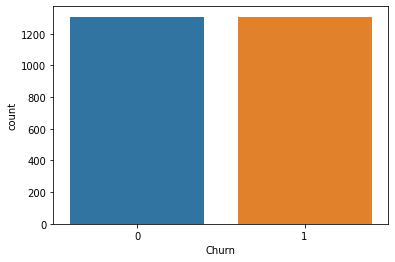

In [ ]:
# Checando o balanceamento das classes
print(pd.Series(y_train_rus_scaled).value_counts())

fig, ax = plt.subplots()
sns.countplot(y_train_rus_scaled)

plt.show();

**Balanceamento dos Dados com Over-Sampling (SMOTE)**

1    3614
0    3614
Name: Churn, dtype: int64


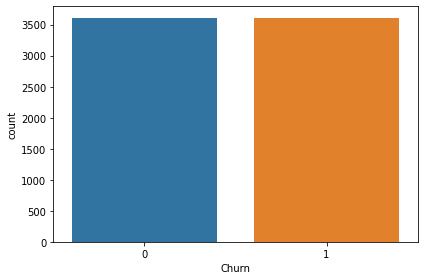

In [ ]:
# Checando o balanceamento das classes
print(pd.Series(y_train_smo_scaled).value_counts())

fig, ax = plt.subplots() 
sns.countplot(y_train_smo_scaled)

plt.tight_layout()

**Balanceamento dos Dados com Over-Sampling (ADASYN)**

1    3657
0    3614
Name: Churn, dtype: int64


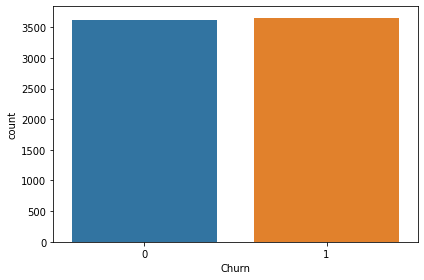

In [ ]:
# Checando o balanceamento das classes
print(pd.Series(y_train_ada_scaled).value_counts())

fig, ax = plt.subplots() 

sns.countplot(y_train_ada_scaled)


plt.tight_layout();

## Avaliando modelos com Cross-Validation (Dados Balanceados)

Agora iremos avaliar os modelos novamente, mas dessa vez com os dados balanceados, para obtermos as melhores métricas. Para cada balanceamento iremos avaliar o melhor modelo, aquele que apresenta a melhor métrica de recall e melhor oportunidade de melhoria nas etapas de ajustes dos hiperparâmetros. Ressaltando, estamos validando nossos modelos novamente com o cross validation, dessa vez com os dados balanceados, mas ainda sem nenhum ajuste de hiperparâmetros.

In [ ]:
# # Definindo funçao de validação com dados balanceados
def val_model_balanced(X, y,clf, quite=False):

  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(clf, X, y, scoring='recall')

  if quite == False:
    print('Recall: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))
  return scores.mean()

### Balanceamento RUS com StandardScaler (scaled)

In [ ]:
# Cross-Validation com Balanceamento RUS e Standard Scaler
print('Cross-validation RF:')
score_teste_rf_rus_scaled = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, rf)
print('\nCross-validation DT:')
score_teste_dt_rus_scaled = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, dt)
print('\nCross-validation SGD:')
score_teste_sgd_rus_scaled = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, sgd)
print('\nCross-validation LR:')
score_teste_lr_rus_scaled = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, lr)
print('\nCross-validation XGB:')
score_teste_xgb_rus_scaled = val_model_balanced(X_train_rus_scaled, y_train_rus_scaled, xgb)

Cross-validation RF:
Recall: 0.7523 (+/- 0.0543)

Cross-validation DT:
Recall: 0.6835 (+/- 0.0490)

Cross-validation SGD:
Recall: 0.7591 (+/- 0.1608)

Cross-validation LR:
Recall: 0.7974 (+/- 0.0483)

Cross-validation XGB:
Recall: 0.7974 (+/- 0.0476)


### Balanceamento RUS com RobustScaler (Rscaled)

In [ ]:
# Cross-Validation com Balanceamento RUS e RobustScaler
print('Cross-validation RF:')
score_teste_rf_rus_Rscaled = val_model_balanced(X_train_rus_Rscaled, y_train_rus_Rscaled, rf)
print('\nCross-validation DT:')
score_teste_dt_rus_Rscaled = val_model_balanced(X_train_rus_Rscaled, y_train_rus_Rscaled, dt)
print('\nCross-validation SGD:')
score_teste_sgd_rus_Rscaled = val_model_balanced(X_train_rus_Rscaled, y_train_rus_Rscaled, sgd)
print('\nCross-validation LR:')
score_teste_lr_rus_Rscaled = val_model_balanced(X_train_rus_Rscaled, y_train_rus_Rscaled, lr)
print('\nCross-validation XGB:')
score_teste_xgb_rus_Rscaled = val_model_balanced(X_train_rus_Rscaled, y_train_rus_Rscaled, xgb)

Cross-validation RF:
Recall: 0.7798 (+/- 0.0399)

Cross-validation DT:
Recall: 0.6842 (+/- 0.0496)

Cross-validation SGD:
Recall: 0.8753 (+/- 0.1593)

Cross-validation LR:
Recall: 0.8058 (+/- 0.0454)

Cross-validation XGB:
Recall: 0.8226 (+/- 0.0511)


#### Avaliando Modelos Balanceamento RUS

In [ ]:
# Imprimir DataSet com os Dados de Recall dos Modelos Escolhidos
model = []
recall= []

model.append('RF RusScaled')
recall.append(score_teste_rf_rus_scaled)    
model.append('RF RusRscaled')
recall.append(score_teste_rf_rus_Rscaled)
model.append('DT RusScaled')
recall.append(score_teste_dt_rus_scaled)  
model.append('DT RusRscaled')
recall.append(score_teste_dt_rus_Rscaled)
model.append('SGD RusScaled')
recall.append(score_teste_sgd_rus_scaled)  
model.append('SGD RusRscaled')
recall.append(score_teste_sgd_rus_Rscaled)
model.append('LR RusScaled')
recall.append(score_teste_lr_rus_scaled)  
model.append('LR RusRscaled')
recall.append(score_teste_lr_rus_Rscaled)
model.append('XGBoost RusScaled')
recall.append(score_teste_xgb_rus_scaled)  
model.append('XGBoost RusRscaled')
recall.append(score_teste_xgb_rus_Rscaled)

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RF RusScaled,0.752283
RF RusRscaled,0.779808
DT RusScaled,0.683507
DT RusRscaled,0.684241
SGD RusScaled,0.759054
SGD RusRscaled,0.875262
LR RusScaled,0.797374
LR RusRscaled,0.805785
XGBoost RusScaled,0.797400
XGBoost RusRscaled,0.822605


Avaliando a tabela acima, podemos verificar que as melhores métricas foram apresentadas nos modelos SGD RusRscaled, LR RusRScaled e XGBoost RusScaled. Para o balanceamento RUS entendemos que o **XGBoost RusRScaled** seria o melhor modelo, uma vez que ele possui diversos parâmetros que podem melhorar ainda mais a métrica encontrada.

### Balanceamento SMOTE com StandardScaler (scaled)

In [ ]:
# Cross-Validation com Balanceamento SMOTE e Standard Scaler
print('Cross-validation RF:')
score_teste_rf_smo_scaled = val_model_balanced(X_train_smo_scaled, y_train_smo_scaled, rf)
print('\nCross-validation DT:')
score_teste_dt_smo_scaled = val_model_balanced(X_train_smo_scaled, y_train_smo_scaled, dt)
print('\nCross-validation SGD:')
score_teste_sgd_smo_scaled = val_model_balanced(X_train_smo_scaled, y_train_smo_scaled, sgd)
print('\nCross-validation LR:')
score_teste_lr_smo_scaled = val_model_balanced(X_train_smo_scaled, y_train_smo_scaled, lr)
print('\nCross-validation XGB:')
score_teste_xgb_smo_scaled = val_model_balanced(X_train_smo_scaled, y_train_smo_scaled, xgb)

Cross-validation RF:
Recall: 0.8727 (+/- 0.2505)

Cross-validation DT:
Recall: 0.7939 (+/- 0.2400)

Cross-validation SGD:
Recall: 0.7839 (+/- 0.0618)

Cross-validation LR:
Recall: 0.8049 (+/- 0.0552)

Cross-validation XGB:
Recall: 0.8573 (+/- 0.3011)


### Balanceamento SMOTE com RobustScaler (Rscaled)

In [ ]:
# Cross-Validation com Balanceamento SMOTE e Robust Scaler
print('Cross-validation RF:')
score_teste_rf_smo_Rscaled = val_model_balanced(X_train_smo_Rscaled, y_train_smo_Rscaled, rf)
print('\nCross-validation DT:')
score_teste_dt_smo_Rscaled = val_model_balanced(X_train_smo_Rscaled, y_train_smo_Rscaled, dt)
print('\nCross-validation SGD:')
score_teste_sgd_smo_Rscaled = val_model_balanced(X_train_smo_Rscaled, y_train_smo_Rscaled, sgd)
print('\nCross-validation LR:')
score_teste_lr_smo_Rscaled = val_model_balanced(X_train_smo_Rscaled, y_train_smo_Rscaled, lr)
print('\nCross-validation XGB:')
score_teste_xgb_smo_Rscaled = val_model_balanced(X_train_smo_Rscaled, y_train_smo_Rscaled, xgb)

Cross-validation RF:
Recall: 0.8700 (+/- 0.2555)

Cross-validation DT:
Recall: 0.7989 (+/- 0.2130)

Cross-validation SGD:
Recall: 0.8046 (+/- 0.1695)

Cross-validation LR:


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall: 0.8069 (+/- 0.0599)

Cross-validation XGB:
Recall: 0.8467 (+/- 0.3062)


#### Avaliando Modelos Balanceamento SMOTE

In [ ]:
# Imprimir DataSet com os Dados de Recall dos Modelos Escolhidos
model = []
recall= []

model.append('RF SMOScaled')
recall.append(score_teste_rf_smo_scaled)    
model.append('RF SMORscaled')
recall.append(score_teste_rf_smo_Rscaled)
model.append('DT SMOScaled')
recall.append(score_teste_dt_smo_scaled)  
model.append('DT SMORscaled')
recall.append(score_teste_dt_smo_Rscaled)
model.append('SGD SMOScaled')
recall.append(score_teste_sgd_smo_scaled)  
model.append('SGD SMORscaled')
recall.append(score_teste_sgd_smo_Rscaled)
model.append('LR SMOScaled')
recall.append(score_teste_lr_smo_scaled)  
model.append('LR SMORscaled')
recall.append(score_teste_lr_smo_Rscaled)
model.append('XGBoost SMOScaled')
recall.append(score_teste_xgb_smo_scaled)  
model.append('XGBoost SMORscaled')
recall.append(score_teste_xgb_smo_Rscaled)

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RF SMOScaled,0.872746
RF SMORscaled,0.869979
DT SMOScaled,0.793890
DT SMORscaled,0.798864
SGD SMOScaled,0.783888
SGD SMORscaled,0.804645
LR SMOScaled,0.804933
LR SMORscaled,0.806862
XGBoost SMOScaled,0.857256
XGBoost SMORscaled,0.846742


Avaliando a tabela acima, podemos verificar que as padronizações StandardScaler e RobustScaler apresentam resultados bastante similares para cada modelo. Observamos as melhores métricas nos modelos de Random Forest e nos modelos de XGBoost. Adotando o mesmo critério utilizado no balanceamento RUS entendemos que o **XGBoost SMOScaled** também seria o melhor modelo deste balanceamento.

### Balanceamento ADASYN com StandardScaler (scaled)

In [ ]:
# Cross-Validation com Balanceamento ADASYN e Standard Scaler
print('Cross-validation RF:')
score_teste_rf_ada_scaled = val_model_balanced(X_train_ada_scaled, y_train_ada_scaled, rf)
print('\nCross-validation DT:')
score_teste_dt_ada_scaled = val_model_balanced(X_train_ada_scaled, y_train_ada_scaled, dt)
print('\nCross-validation SGD:')
score_teste_sgd_ada_scaled = val_model_balanced(X_train_ada_scaled, y_train_ada_scaled, sgd)
print('\nCross-validation LR:')
score_teste_lr_ada_scaled = val_model_balanced(X_train_ada_scaled, y_train_ada_scaled, lr)
print('\nCross-validation XGB:')
score_teste_xgb_ada_scaled = val_model_balanced(X_train_ada_scaled, y_train_ada_scaled, xgb)

Cross-validation RF:
Recall: 0.8683 (+/- 0.2295)

Cross-validation DT:
Recall: 0.7704 (+/- 0.2198)

Cross-validation SGD:
Recall: 0.7826 (+/- 0.1232)

Cross-validation LR:
Recall: 0.7960 (+/- 0.0875)

Cross-validation XGB:
Recall: 0.8461 (+/- 0.3104)


### Balanceamento ADASYN com RobustScaler (Rscaled)

In [ ]:
# Cross-Validation com Balanceamento ADASYN e Robust Scaler
print('Cross-validation RF:')
score_teste_rf_ada_Rscaled = val_model_balanced(X_train_ada_Rscaled, y_train_ada_Rscaled, rf)
print('\nCross-validation DT:')
score_teste_dt_ada_Rscaled = val_model_balanced(X_train_ada_Rscaled, y_train_ada_Rscaled, dt)
print('\nCross-validation SGD:')
score_teste_sgd_ada_Rscaled = val_model_balanced(X_train_ada_Rscaled, y_train_ada_Rscaled, sgd)
print('\nCross-validation LR:')
score_teste_lr_ada_Rscaled = val_model_balanced(X_train_ada_Rscaled, y_train_ada_Rscaled, lr)
print('\nCross-validation XGB:')
score_teste_xgb_ada_Rscaled = val_model_balanced(X_train_ada_Rscaled, y_train_ada_Rscaled, xgb)

Cross-validation RF:
Recall: 0.8673 (+/- 0.2263)

Cross-validation DT:
Recall: 0.7521 (+/- 0.2254)

Cross-validation SGD:
Recall: 0.7882 (+/- 0.2321)

Cross-validation LR:


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall: 0.7910 (+/- 0.1121)

Cross-validation XGB:
Recall: 0.8470 (+/- 0.3122)


#### Avaliando Modelos Balanceamento ADASYN

In [ ]:
# Imprimir DataSet com os Dados de Recall dos Modelos Escolhidos
model = []
recall= []

model.append('RF ADAScaled')
recall.append(score_teste_rf_ada_scaled)    
model.append('RF ADARscaled')
recall.append(score_teste_rf_ada_Rscaled)
model.append('DT ADAScaled')
recall.append(score_teste_dt_ada_scaled)  
model.append('DT ADARscaled')
recall.append(score_teste_dt_ada_Rscaled)
model.append('SGD ADAScaled')
recall.append(score_teste_sgd_ada_scaled)  
model.append('SGD ADARscaled')
recall.append(score_teste_sgd_ada_Rscaled)
model.append('LR ADAScaled')
recall.append(score_teste_lr_ada_scaled)  
model.append('LR ADARscaled')
recall.append(score_teste_lr_ada_Rscaled)
model.append('XGBoost ADAScaled')
recall.append(score_teste_xgb_ada_scaled)  
model.append('XGBoost ADARscaled')
recall.append(score_teste_xgb_ada_Rscaled)

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RF ADAScaled,0.868273
RF ADARscaled,0.867272
DT ADAScaled,0.770376
DT ADARscaled,0.752068
SGD ADAScaled,0.782570
SGD ADARscaled,0.788235
LR ADAScaled,0.795982
LR ADARscaled,0.791004
XGBoost ADAScaled,0.846147
XGBoost ADARscaled,0.846952


Assim como foi o que foi apresentado no balanceamento SMOTE, também observamos as melhores métricas nos modelos de Random Forest e XGBoost. Adotando o mesmo critério utilizado nos balanceamentos anteriores entendemos que o **XGBoost ADARscaled** seria o melhor modelo deste balanceamento.

### Avaliando os melhores modelos de cada balanceamento

Conforme documentamos anteriormente, as melhores métricas de recall foram encontradas nos modelos de XGBoost, para cada balanceamento realizado, vide tabela abaixo:

In [ ]:
# Imprimir DataSet com os Dados de Recall dos Modelos Escolhidos
model = []
recall= []

model.append('XGBoost RusRscaled')
recall.append(score_teste_xgb_rus_Rscaled)
model.append('XGBoost SMOScaled')
recall.append(score_teste_xgb_smo_scaled)
model.append('XGBoost ADARScaled')
recall.append(score_teste_xgb_ada_Rscaled)

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
XGBoost RusRscaled,0.822605
XGBoost SMOScaled,0.857256
XGBoost ADARScaled,0.846952


Agora vamos para etapa de otimização e ajuste fino dos hiperparâmetros do modelo para cada balanceamento, para compararmos os resultados.

#5 - Otimização dos hiperparâmetros e avaliações finais dos modelos

A próxima etapa consiste na otimização dos hiperparâmetros dos modelos. Faremos esse processo para o modelo XGBoost em cada tipo de balanceamento, realizando os ajustes finos necessários. O modelo XGBoost possui inúmeros parâmetros. Alguns afetam mais a qualidade do modelo, outros menos. Uma boa prática é definir uma taxa de aprendizado e número de estimadores, realizar tuning de outros parâmetros e, no final, checar outras taxas de aprendizado.

Abaixo, iremos ajustar o número de estimadores. O modelo foi instanciado com a `learning_rate=0.1`.

## Otimização XGBoost - RUSRscaled

In [ ]:
# modelo a ser otimizado
xgb_rus_Rscaled = XGBClassifier(learning_rate=0.1)

# parâmetros a serem otimizados
param_grid = {
      'n_estimators':[0,10,50,100],
}

# identificar os melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus_Rscaled, y_train_rus_Rscaled)

# ver resultados
print(f'Melhor resultado: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor resultado: 0.8249559600704639 para {'n_estimators': 10}


Uma vez com o número de estimadores definido para 10, vamos realizar a 
busca para os parâmetros `max_depth` e `min_child_weight.`

In [ ]:
xgb_rus_Rscaled = XGBClassifier(learning_rate=0.1, n_estimators=10)

param_grid = {
 'max_depth': range(1,4,1),
 'min_child_weight': range(1,4,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus_Rscaled, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus_Rscaled, y_train_rus_Rscaled)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8914445096887846 para {'max_depth': 1, 'min_child_weight': 1}


Obtidos os valores de `max_depth=1` e `min_child_weight=1`, iremos otimizar o parâmetro `gamma`.





In [ ]:
# Modelo a ser otimizado
xgb_rus_Rscaled = XGBClassifier(learning_rate=0.1, n_estimators=10, max_depth=1, min_child_weight=1)

# Parâmetros a serem otimizados
param_grid = {
    'gamma':[0, 0.5, 1, 3]
}

# Identificar melhores parâmetros 
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus_Rscaled, y_train_rus_Rscaled)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8914679976512037 para {'gamma': 0}


Com `gamma=0`, chegou a hora de testar outros valores para `learning_rate`. Dessa forma, podemos otimizar ainda mais o modelo e saber qual valor nos entregará o melhor resultado.

In [ ]:
xgb_rus_Rscaled = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.015, 0.1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus_Rscaled, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus_Rscaled, y_train_rus_Rscaled)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8914034057545509 para {'learning_rate': 0.001}


###  Avaliação modelo XGBoost - RUSRscaled

Uma vez identificados os melhores ajustes de hiperparâmetros, vamos realizar a validação em nossa base de testes.

              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1549
           1       0.41      0.87      0.56       561

    accuracy                           0.64      2110
   macro avg       0.67      0.71      0.62      2110
weighted avg       0.79      0.64      0.65      2110

AUC: 0.7108

Recall:		0.8717


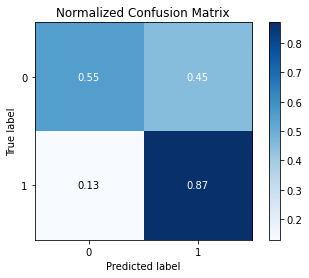

In [ ]:
# modelo final
xgb_rus_Rscaled = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0)

# treinando o modelo
xgb_rus_Rscaled.fit(X_train_rus_Rscaled, y_train_rus_Rscaled)

# fazer a previsão
X_test_Rscaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)
y_pred_xgb_rus_Rscaled = xgb_rus_Rscaled.predict(X_test_Rscaled)

# Classification Report
print(classification_report(y_test, y_pred_xgb_rus_Rscaled))

# imprimir a área sob a curva e Recall score
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_xgb_rus_Rscaled)))
print(f'Recall:\t\t{recall_score(y_test, y_pred_xgb_rus_Rscaled, pos_label=1):0.4f}')

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred_xgb_rus_Rscaled, normalize=True)
plt.show();

## Otimização XGBoost - SMOscaled

Agora vamos realizar os mesmos procedimentos para o XGBoost nos outros tipos de balanceamentos.

In [ ]:
# modelo a ser otimizado
xgb_smo_scaled = XGBClassifier(learning_rate=0.1)

# parâmetros a serem otimizados
param_grid = {
      'n_estimators':[0,10,50,100],
}

# identificar os melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_smo_scaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_smo_scaled, y_train_smo_scaled)

# ver resultados
print(f'Melhor resultado: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor resultado: 0.8774299444452947 para {'n_estimators': 50}


In [ ]:
xgb_smo_scaled = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth': range(1,4,1),
 'min_child_weight': range(1,4,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_smo_scaled, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_smo_scaled, y_train_smo_scaled)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8773985705759019 para {'max_depth': 3, 'min_child_weight': 3}


In [ ]:
# Modelo a ser otimizado
xgb_smo_scaled = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=3, min_child_weight=3)

# Parâmetros a serem otimizados
param_grid = {
    'gamma':[0, 0.5, 1, 3]
}

# Identificar melhores parâmetros 
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_smo_scaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_smo_scaled, y_train_smo_scaled)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8777077179718706 para {'gamma': 1}


In [ ]:
xgb_smo_scaled = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=3, gamma=1)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.015, 0.1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_smo_scaled, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_smo_scaled, y_train_smo_scaled)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8730077592935522 para {'learning_rate': 0.1}


### Avaliação modelo XGBoost - SMOscaled

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1549
           1       0.54      0.75      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110

AUC: 0.7599

Recall:		0.7451


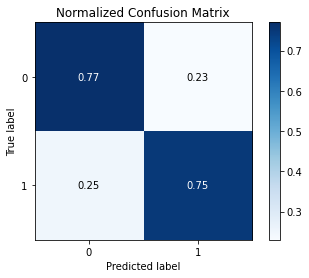

In [ ]:
# modelo final
xgb_smo_scaled = XGBClassifier(learning_rate=0.1 , n_estimators=50, max_depth=3, min_child_weight=3, gamma=1)

# treinando o modelo
xgb_smo_scaled.fit(X_train_smo_scaled, y_train_smo_scaled)

# fazer a previsão
# X_test_Rscaled = scaler.transform(X_test)
# X_test_scaled = scaler.transform(X_test)
y_pred_xgb_smo_scaled = xgb_smo_scaled.predict(X_test_scaled)

# Classification Report
print(classification_report(y_test, y_pred_xgb_smo_scaled))

# imprimir a área sob a curva e Recall score
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_xgb_smo_scaled)))
print(f'Recall:\t\t{recall_score(y_test, y_pred_xgb_smo_scaled, pos_label=1):0.4f}')

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred_xgb_smo_scaled, normalize=True)
plt.show();

## Otimização XGBoost - ADARscaled

In [ ]:
# modelo a ser otimizado
xgb_ada_Rscaled = XGBClassifier(learning_rate=0.1)

# parâmetros a serem otimizados
param_grid = {
      'n_estimators':[0,10,50,100],
}

# identificar os melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ada_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_ada_Rscaled, y_train_ada_Rscaled)

# ver resultados
print(f'Melhor resultado: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor resultado: 0.8812248357702904 para {'n_estimators': 50}


In [ ]:
xgb_ada_Rscaled = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth': range(1,4,1),
 'min_child_weight': range(1,4,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ada_Rscaled, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_ada_Rscaled, y_train_ada_Rscaled)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8782111827566373 para {'max_depth': 3, 'min_child_weight': 1}


In [ ]:
# Modelo a ser otimizado
xgb_ada_Rscaled = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=3, min_child_weight=1)

# Parâmetros a serem otimizados
param_grid = {
    'gamma':[0, 0.5, 1, 3]
}

# Identificar melhores parâmetros 
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ada_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_ada_Rscaled, y_train_ada_Rscaled)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8798436412072774 para {'gamma': 0}


In [ ]:
xgb_ada_Rscaled = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=1, gamma=0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.015, 0.1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ada_Rscaled, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_ada_Rscaled, y_train_ada_Rscaled)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.878479096660915 para {'learning_rate': 0.1}


### Avaliação modelo XGBoost - ADARscaled

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1549
           1       0.48      0.82      0.61       561

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.72      0.74      2110

AUC: 0.7504

Recall:		0.8164


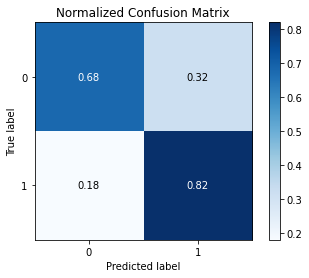

In [ ]:
# modelo final
xgb_ada_Rscaled = XGBClassifier(learning_rate=0.1 , n_estimators=50, max_depth=3, min_child_weight=3, gamma=3)

# treinando o modelo
xgb_ada_Rscaled.fit(X_train_ada_Rscaled, y_train_ada_Rscaled)

# fazer a previsão
# X_test_Rscaled = scaler.transform(X_test)
# X_test_scaled = scaler.transform(X_test)
y_pred_xgb_ada_Rscaled = xgb_ada_Rscaled.predict(X_test_Rscaled)

# Classification Report
print(classification_report(y_test, y_pred_xgb_ada_Rscaled))

# imprimir a área sob a curva e Recall score
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_xgb_ada_Rscaled)))
print(f'Recall:\t\t{recall_score(y_test, y_pred_xgb_ada_Rscaled, pos_label=1):0.4f}')

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred_xgb_ada_Rscaled, normalize=True)
plt.show();

#6 - Comparando os modelos finais

Agora vamos plotar um comparativo dos resultados dos três modelos de XGBoost aplicados a nossa base de testes, analisando os melhores resultados e melhores  aplicabilidades ao nosso problema.

In [ ]:
print('Métricas - XGBoost_Rscaled - Random Under Sampling')
print(f'Recall:\t\t{recall_score(y_test, y_pred_xgb_rus_Rscaled, pos_label=1):0.4f}')
print(f'AUC:\t\t{roc_auc_score(y_test, y_pred_xgb_rus_Rscaled):0.4f}')

print('\nMétricas - XGBoost_scaled - SMOTE')
print(f'Recall:\t\t{recall_score(y_test, y_pred_xgb_smo_scaled, pos_label=1):0.4f}')
print(f'AUC:\t\t{roc_auc_score(y_test, y_pred_xgb_smo_scaled):0.4f}')

print('\nMétricas - XGBoost_rscaled - ADASYN')
print(f'Recall:\t\t{recall_score(y_test, y_pred_xgb_ada_Rscaled, pos_label=1):0.4f}')
print(f'AUC:\t\t{roc_auc_score(y_test, y_pred_xgb_ada_Rscaled):0.4f}')

Métricas - XGBoost_Rscaled - Random Under Sampling
Recall:		0.8717
AUC:		0.7108

Métricas - XGBoost_scaled - SMOTE
Recall:		0.7451
AUC:		0.7599

Métricas - XGBoost_rscaled - ADASYN
Recall:		0.8164
AUC:		0.7504


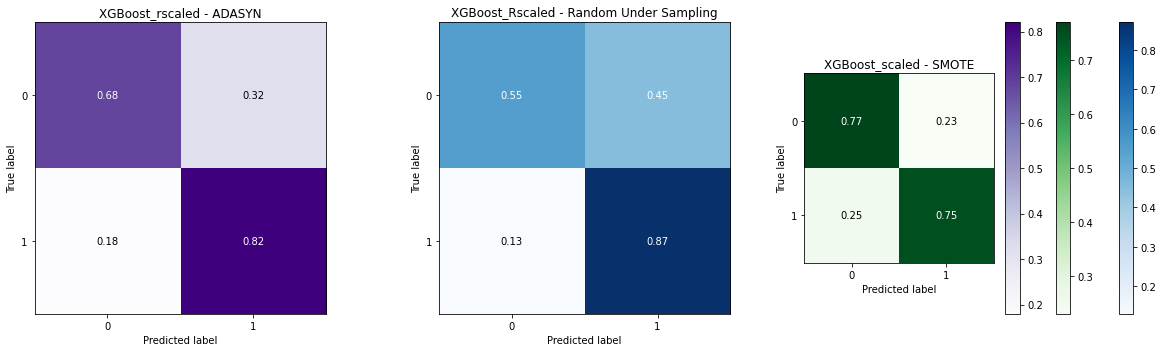

In [ ]:
from scikitplot.metrics import confusion_matrix
import sklearn
from matplotlib import colorbar


fig, ax = plt.subplots(1, 3,figsize=(17,5))

skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb_rus_Rscaled, normalize=True, title='XGBoost_Rscaled - Random Under Sampling', ax=ax[1])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb_smo_scaled, normalize=True, title='XGBoost_scaled - SMOTE',ax=ax[2], cmap= plt.cm.Greens)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb_ada_Rscaled, normalize=True, title='XGBoost_rscaled - ADASYN',ax=ax[0], cmap= plt.cm.Purples)


plt.tight_layout();

# Conclusão

<p align=center>
<img src="https://res.cloudinary.com/dn1j6dpd7/image/fetch/f_auto,q_auto,w_736/https://www.livechat.com/wp-content/uploads/2016/04/customer-churn@2x.jpg" width="60%"></p>




Após realizarmos todos os procedimentos de limpeza dos dados, padronização, balanceamento, comparabilidade de modelos baselines e ajustes de hiperparâmetros, podemos considerar que nosso trabalho apresentou um resultado satisfatório.

Dentre os modelos avaliados, o XGBoost foi o escolhido para ser aplicado em cada balanceamento, justamente pela possibilidade de inúmeros ajustes nos hiperparâmetros. Fizemos poucos ajustes, e até seguimos um padrão para essa etapa de fine-tunning. Mas poderíamos muito bem configurar individualmente cada modelo, para cada balanceamento e ajustar outros pontos que não consideramos. Evidente que isso nos demandaria mais tempo e elevaria o custo do projeto. Por isso é sempre importante e prudente avaliarmos o resultado que queremos atingir, o tempo que vamos levar pra isso, considerando deadlines do projeto e colocar tudo na balança. 

Concluindo, podemos verificar dentre os modelos acima que:

* **O melhor modelo para detecção de Churn** na base de testes foi o **XGBoost** com dados padronizados pelo Robust Scaler e balanceados pelo **Random Under Sampling, conseguindo acertar 87% dos casos de churn**.

* Ainda sobre o modelo XGBoost balanceado pelo Random Under Sampling, é interessante observamos as melhorias que os ajustes dos hiperparâmetros trouxeram para o modelo. No modelo baseline, sem nenhum ajuste, a métrica de recall encontrada foi de 0.82. Na aplicação na base de teste, após os ajustes finos, encontramos um resultado 0.87, o que melhorou em aproximadamente 6% nosso recall.

* **O melhor modelo para detecção do que não é Churn** é o **XGBoost** com dados padronizados pelo Standar Scaler balanceados pelo Over Sampling **SMOTE , conseguindo acertar esses casos do que não é churn em 77%**.

* O modelo XGBoost balanceado pelo Over Sampling ADASYN também conseguiu um bom resultado, inclusive se saindo melhor que o modelo Random Under Sampling na detecção do que não é Churn. Mas o % de acertos de Churn no Random Under Sampling é maior, e é o que mais pesa em nosso problema.

Portanto, considerando que estamos priorizando as métricas de **Recall** para para o nosso problema e considerando o prejuízo financeiro que um churn não sinalizado e monitorado pode gerar para a empresa, entendemos que modelo balanceado pelo Random Under Sampling apresentou os melhores resultados.